<div align="center">

# Strategic Export Analytics: Machine Learning and Business Intelligence for U.S. SMEs

</div>


This analysis decodes the export dynamics of U.S. small businesses through a rigorous fusion of machine learning, statistical modeling, and business strategy. Leveraging K-Means clustering, PCA, and variance analysis on granular firm-level data, it identifies hidden patterns in export behavior—segmenting businesses by financial metrics, ownership demographics, and operational scale. Key insights include quantifiable thresholds for export readiness (e.g., 59.7% of exporters are sub-$1M firms), ownership-driven export intensity (female-owned firms outperform by 46% in export-to-revenue ratios), and high-impact clusters (e.g., outlier groups with 7,364% export ratios). Designed for policymakers and business leaders, the framework transforms raw data into actionable strategies: optimizing trade incentives, targeting underrepresented ownership groups, and aligning financial support with empirically defined exporter archetypes. By bridging technical depth (64.5% PCA-explained variance) and strategic relevance, this work redefines how data science drives equitable economic growth in global markets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

Set visualization style

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

---------------------------------------<br>
Step 1: Data Loading & Exporter Identification<br>
---------------------------------------

Load data 

In [6]:
# Read Excel files (replace with your actual file paths)
df1 = pd.read_excel(r"C:\Coding World\WQ Project #6\project_usa_businesses\dataset\Table2.xlsx", header=None)

# Remove first 2 and last 2 rows
df1_clean_1 = df1.iloc[2:-12].reset_index(drop=True)

# Use the first row after cleaning as header
df1_clean_1.columns = df1_clean_1.iloc[0]
df1_clean_1 = df1_clean_1[1:]


# Print column names from both
print("📘 Columns from file1:")
print(list(df1_clean_1.columns))

📘 Columns from file1:
['Exporting Status[1]', 'Receipt Size', 'Sex, Ethnicity, Race, and Veteran Status', 'Employer firms \n(number)', 'Receipts of employer firms \n($1,000)', 'Exports of employer firms \n($1,000)', 'Number of paid employees \n(number)', 'Annual payroll \n($1,000)', 'RSE of employer firms \n(%)', 'RSE of receipts of employer firms \n(%)', 'RSE of exports of employer firms \n(%)', 'RSE of number of paid employees \n(%)', 'RSE of annual payroll \n(%)']


In [7]:
df1_clean_1.tail()

,Exporting Status[1],Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms \n(number),"Receipts of employer firms \n($1,000)","Exports of employer firms \n($1,000)",Number of paid employees \n(number),"Annual payroll \n($1,000)",RSE of employer firms \n(%),RSE of receipts of employer firms \n(%),RSE of exports of employer firms \n(%),RSE of number of paid employees \n(%),RSE of annual payroll \n(%)
586,Employer firms without exports,"Firms with sales/receipts of $1,000,000 or more",Minority,326226,1454082209,X,7051660,318678054,0.5,2.7,X,1.1,1.2
587,Employer firms without exports,"Firms with sales/receipts of $1,000,000 or more",Equally minority/nonminority,26776,134035207,X,650772,34092291,3.1,4.4,X,2.8,3
588,Employer firms without exports,"Firms with sales/receipts of $1,000,000 or more",Nonminority,1246853,10095991459,X,37788587,2067464802,0.5,1.1,X,0.8,0.9
589,Employer firms without exports,"Firms with sales/receipts of $1,000,000 or more",Veteran,70355,556340813,X,2147433,120251641,1.7,3.4,X,2.5,2.2
590,Employer firms without exports,"Firms with sales/receipts of $1,000,000 or more",Equally veteran/nonveteran,29356,161904235,X,723853,36906201,3.2,4.4,X,2.8,3.3


In [8]:
# Rename columns
new_column_names = ['Exporting Status', 'Receipt Size', 'Sex, Ethnicity, Race, and Veteran Status', 'Employer firms(number)', 'Receipts of employer firms($1,000)', 'Exports of employer firms($1,000)', 'Number of paid employees(number)', 'Annual payroll($1,000)', 'RSE of employer firms(%)', 'RSE of receipts of employer firms(%)', 'RSE of exports of employer firms(%)', 'RSE of number of paid employees(%)', 'RSE of annual payroll(%)']
df1_clean_1.columns = new_column_names

# Check for duplicates
duplicate_rows = df1_clean_1.duplicated()
duplicate_count = duplicate_rows.sum()

# Print duplicate count
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df1_clean_2 = df1_clean_1.drop_duplicates().reset_index(drop=True)

# Display result
df1_clean_2.head()


Number of duplicate rows: 0


,Exporting Status,Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms(number),"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Number of paid employees(number),"Annual payroll($1,000)",RSE of employer firms(%),RSE of receipts of employer firms(%),RSE of exports of employer firms(%),RSE of number of paid employees(%),RSE of annual payroll(%)
0,Employer firms with and without exports,All firms,Total,5876787,49999500332,1540693608,136514851,8429893522,0,0.4,1.5,0.2,0.3
1,Employer firms with and without exports,All firms,Female,1309282,2138235179,40106683,11380866,508548940,0.4,1.5,28.2,1.3,1.6
2,Employer firms with and without exports,All firms,Male,3633787,14412234417,260928527,48887715,2725308945,0.1,1.3,4.5,0.5,0.6
3,Employer firms with and without exports,All firms,Equally male/female,706324,1351902442,16520295,6784242,291858354,0.7,1.6,9.5,1.3,1.5
4,Employer firms with and without exports,All firms,Hispanic,465202,653467996,16411716,3550203,143246171,0.7,3.3,21.5,2,2.2


Calculate the proportion of exporting vs non-exporting firms

In [9]:
dfa = df1_clean_2.copy()

In [10]:
exporter_counts = dfa['Exporting Status'].value_counts()
exporter_percentages = exporter_counts / exporter_counts.sum() * 100

print("\nExporting Status Counts:")
print(exporter_counts)

print("\nExporting Status Percentage:")
print(exporter_percentages)


Exporting Status Counts:
Exporting Status
Employer firms with and without exports     200
Employer firms without exports              197
Employer firms with exports                 193
Name: count, dtype: int64

Exporting Status Percentage:
Exporting Status
Employer firms with and without exports     33.898305
Employer firms without exports              33.389831
Employer firms with exports                 32.711864
Name: count, dtype: float64


Plot the distribution

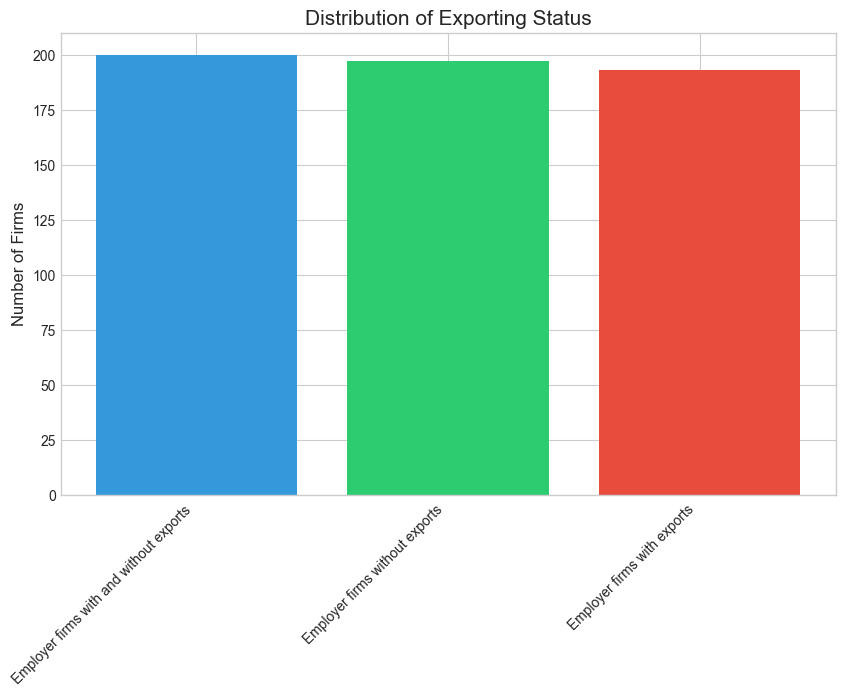

In [12]:
plt.figure(figsize=(10, 6))
bars = plt.bar(exporter_counts.index, exporter_counts, color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Distribution of Exporting Status', fontsize=15)
plt.ylabel('Number of Firms', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig('images/export_status_distribution.png', dpi=300, bbox_inches='tight')

Add percentage labels on top of bars

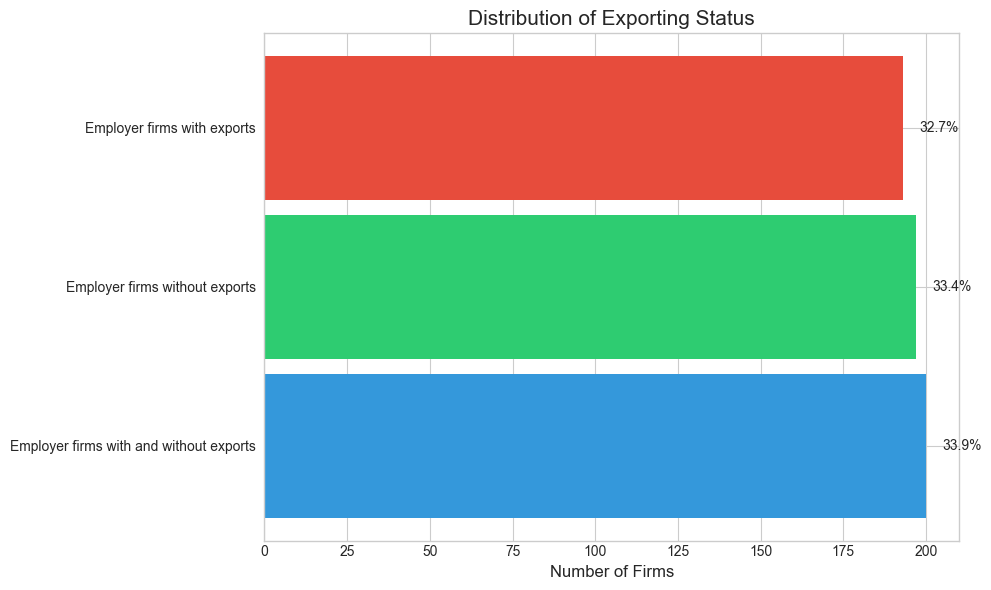

In [13]:
# For datasets with many categories, use horizontal bars
plt.figure(figsize=(10, 6))  # Scale height based on number of items6
# bars = plt.barh(exporter_counts.index, exporter_counts, color=['#3498db', '#2ecc71', '#e74c3c'])
bars = plt.barh(exporter_counts.index, exporter_counts, 
                color=['#3498db', '#2ecc71', '#e74c3c'], 
                height=0.9)  # Default is 0.8; increase to 1.0, 1.2, etc.

# Add percentages at the end of each bar
for bar, percentage in zip(bars, exporter_percentages):
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{percentage:.1f}%',
             ha='left', va='center', fontsize=10)
    
plt.title('Distribution of Exporting Status', fontsize=15)
plt.xlabel('Number of Firms', fontsize=12)    
plt.tight_layout()

plt.savefig('images/export_status_distribution_hz.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
print(f"Exporting firms represent {exporter_percentages[0]:.1f}% of all firms in the dataset.")

Exporting firms represent 33.9% of all firms in the dataset.


---------------------------------------<br>
Step 2: Business Size Distribution Analysis<br>
---------------------------------------

Create size categories based on receipts

In [15]:
def create_size_categories(dfa, column, bins, labels):
    dfa_copy = dfa.copy()
    dfa_copy['Size Category'] = pd.cut(dfa_copy[column], bins=bins, labels=labels)
    return dfa_copy

Define receipt size categories

In [16]:
receipt_bins = [0, 1000000, 5000000, 10000000, 50000000, float('inf')]
receipt_labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

Apply size categories

In [17]:
dfa.columns

Index(['Exporting Status', 'Receipt Size',
       'Sex, Ethnicity, Race, and Veteran Status', 'Employer firms(number)',
       'Receipts of employer firms($1,000)',
       'Exports of employer firms($1,000)', 'Number of paid employees(number)',
       'Annual payroll($1,000)', 'RSE of employer firms(%)',
       'RSE of receipts of employer firms(%)',
       'RSE of exports of employer firms(%)',
       'RSE of number of paid employees(%)', 'RSE of annual payroll(%)'],
      dtype='object')

In [18]:
# Replace non-numeric values with NaN
dfa['Receipts of employer firms($1,000)'] = pd.to_numeric(dfa['Receipts of employer firms($1,000)'], errors='coerce')

df_with_size = create_size_categories(
    dfa, 
    'Receipts of employer firms($1,000)', 
    receipt_bins, 
    receipt_labels
)
print("\nSample of the dataset with size categories:")
df_with_size.head()


Sample of the dataset with size categories:


,Exporting Status,Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms(number),"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Number of paid employees(number),"Annual payroll($1,000)",RSE of employer firms(%),RSE of receipts of employer firms(%),RSE of exports of employer firms(%),RSE of number of paid employees(%),RSE of annual payroll(%),Size Category
0,Employer firms with and without exports,All firms,Total,5876787,4.999950e+10,1540693608,136514851,8429893522,0,0.4,1.5,0.2,0.3,Very Large
1,Employer firms with and without exports,All firms,Female,1309282,2.138235e+09,40106683,11380866,508548940,0.4,1.5,28.2,1.3,1.6,Very Large
2,Employer firms with and without exports,All firms,Male,3633787,1.441223e+10,260928527,48887715,2725308945,0.1,1.3,4.5,0.5,0.6,Very Large
3,Employer firms with and without exports,All firms,Equally male/female,706324,1.351902e+09,16520295,6784242,291858354,0.7,1.6,9.5,1.3,1.5,Very Large
4,Employer firms with and without exports,All firms,Hispanic,465202,6.534680e+08,16411716,3550203,143246171,0.7,3.3,21.5,2,2.2,Very Large


Create separate dataframes for exporters and non-exporters

In [19]:
df_with_size['Exporting Status']== 'Employer firms with and without exports '

0       True
1       True
2       True
3       True
4       True
       ...  
585    False
586    False
587    False
588    False
589    False
Name: Exporting Status, Length: 590, dtype: bool

In [20]:
exporters = df_with_size[df_with_size['Exporting Status'] == 'Employer firms with exports ']
non_exporters = df_with_size[df_with_size['Exporting Status'] == 'Employer firms without exports ']

print("\nExporters", exporters)
print("\nNon_Exporters", non_exporters.head(3))


Exporters                  Exporting Status  \
200  Employer firms with exports    
201  Employer firms with exports    
202  Employer firms with exports    
203  Employer firms with exports    
204  Employer firms with exports    
..                            ...   
388  Employer firms with exports    
389  Employer firms with exports    
390  Employer firms with exports    
391  Employer firms with exports    
392  Employer firms with exports    

                                         Receipt Size  \
200                                        All firms    
201                                        All firms    
202                                        All firms    
203                                        All firms    
204                                        All firms    
..                                                ...   
388  Firms with sales/receipts of $1,000,000 or more    
389  Firms with sales/receipts of $1,000,000 or more    
390  Firms with sales/receipts 

Calculate normalized frequency (percentage within each group)

In [21]:
exporter_size_dist = exporters['Size Category'].value_counts(normalize=True).sort_index() * 100
nonexporter_size_dist = non_exporters['Size Category'].value_counts(normalize=True).sort_index() * 100

print('Exporter size distribution: ', exporter_size_dist)
print('\nNon Exporter size distribution: ', nonexporter_size_dist)

Exporter size distribution:  Size Category
Very Small    59.740260
Small         12.337662
Medium         4.545455
Large          5.194805
Very Large    18.181818
Name: proportion, dtype: float64

Non Exporter size distribution:  Size Category
Very Small    35.714286
Small         11.734694
Medium         8.163265
Large         11.734694
Very Large    32.653061
Name: proportion, dtype: float64


Create a comparative bar chart

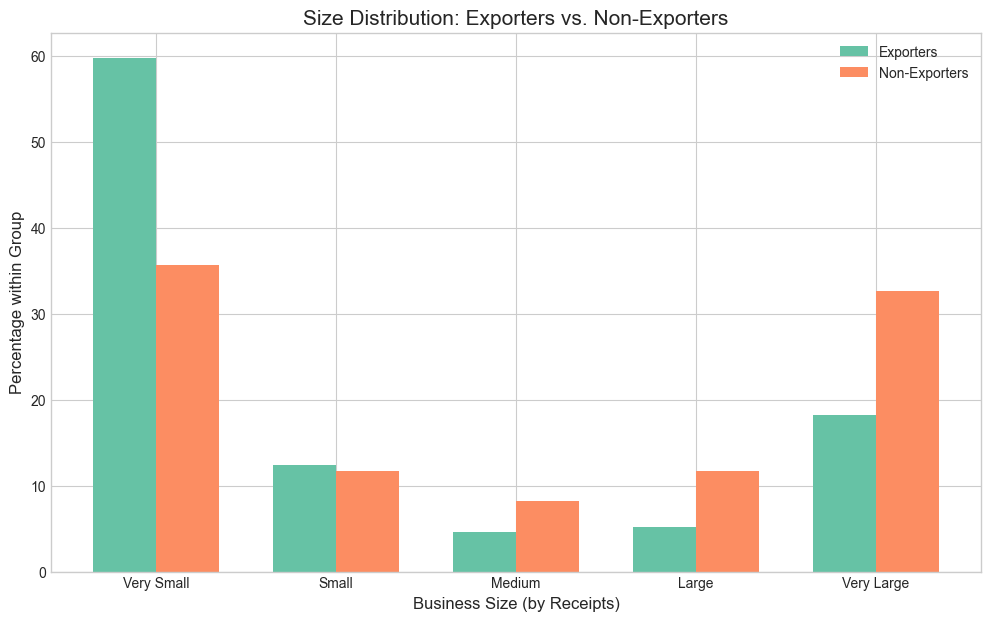

In [80]:
plt.figure(figsize=(12, 7))
x = np.arange(len(receipt_labels))
width = 0.35

plt.bar(x - width/2, exporter_size_dist, width, label='Exporters')
plt.bar(x + width/2, nonexporter_size_dist, width, label='Non-Exporters')

plt.xlabel('Business Size (by Receipts)', fontsize=12)
plt.ylabel('Percentage within Group', fontsize=12)
plt.title('Size Distribution: Exporters vs. Non-Exporters', fontsize=15)
plt.xticks(x, receipt_labels)
plt.legend()

plt.savefig('images/size_dist_exp_vs_non_exp.png', dpi=300, bbox_inches='tight')

Add percentage labels

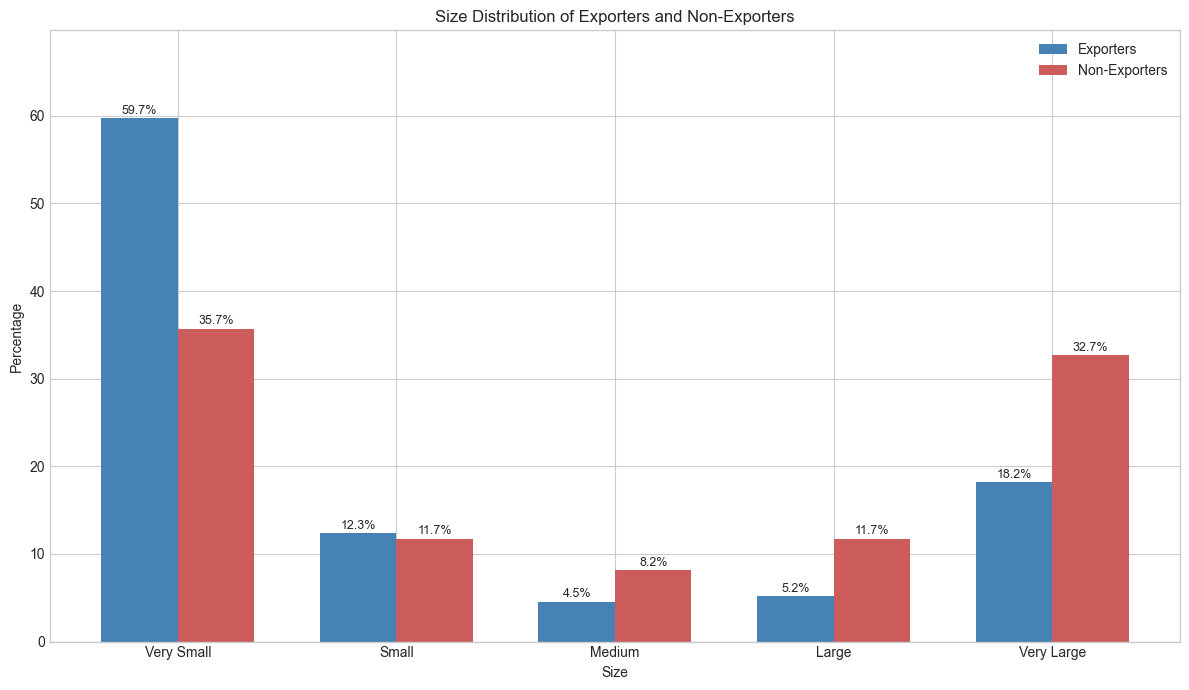

In [81]:
# Get the shared index (categories)
categories = exporter_size_dist.index
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars
bars1 = ax.bar(x - width/2, exporter_size_dist.values, width, label='Exporters', color='steelblue')
bars2 = ax.bar(x + width/2, nonexporter_size_dist.values, width, label='Non-Exporters', color='indianred')

# Add data labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=9)

# Customize the plot
ax.set_ylabel('Percentage')
ax.set_xlabel('Size')
ax.set_title('Size Distribution of Exporters and Non-Exporters')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, max(exporter_size_dist.max(), nonexporter_size_dist.max()) + 10)

plt.tight_layout()

plt.savefig('images/size_dist_exp_vs_non_exp.png', dpi=300, bbox_inches='tight')
plt.show()


Print statistical summary

In [24]:
print("Statistical comparison of business sizes:")
comparison_df = pd.DataFrame({
    'Exporters (%)': exporter_size_dist,
    'Non-Exporters (%)': nonexporter_size_dist
})
print(comparison_df)

Statistical comparison of business sizes:
               Exporters (%)  Non-Exporters (%)
Size Category                                  
Very Small         59.740260          35.714286
Small              12.337662          11.734694
Medium              4.545455           8.163265
Large               5.194805          11.734694
Very Large         18.181818          32.653061


---------------------------------------<br>
Step 3: Export-Revenue Relationship Analysis<br>
---------------------------------------

For this scatter plot, we'll focus only on exporting firms

In [25]:
exporting_firms = dfa[dfa['Exporting Status'] == 'Employer firms with exports '].copy()

exporting_firms.head()

,Exporting Status,Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms(number),"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Number of paid employees(number),"Annual payroll($1,000)",RSE of employer firms(%),RSE of receipts of employer firms(%),RSE of exports of employer firms(%),RSE of number of paid employees(%),RSE of annual payroll(%)
200,Employer firms with exports,All firms,Total,160083,2.942224e+10,1540693608,54254922,4052059959,0.7,0.6,1.5,0.6,0.7
201,Employer firms with exports,All firms,Female,20990,4.496144e+08,40106683,958874,67516420,2.1,6.4,28.2,3.7,4.4
202,Employer firms with exports,All firms,Male,108009,4.283172e+09,260928527,8189120,609809815,1.6,2.8,4.5,1.5,1.5
203,Employer firms with exports,All firms,Equally male/female,15405,2.431508e+08,16520295,561059,40989809,3.4,2.7,9.5,5.6,3.8
204,Employer firms with exports,All firms,Hispanic,9766,9.323926e+07,16411716,182726,11819099,5.1,6.5,21.5,3.7,3.6


Convert columns to millions for better readability in the plot

In [26]:
exporting_firms['Exports of employer firms($1,000)'] = pd.to_numeric(exporting_firms['Exports of employer firms($1,000)'], errors='coerce')
exporting_firms['Receipts of employer firms($1,000)'] = pd.to_numeric(exporting_firms['Receipts of employer firms($1,000)'], errors='coerce')
exporting_firms['Number of paid employees(number)'] = pd.to_numeric(exporting_firms['Number of paid employees(number)'], errors='coerce')
exporting_firms['Annual payroll($1,000)'] = pd.to_numeric(exporting_firms['Annual payroll($1,000)'], errors='coerce')

exporting_firms['Receipts (Millions)'] = exporting_firms['Receipts of employer firms($1,000)'] / 1000
exporting_firms['Exports (Millions)'] = exporting_firms['Exports of employer firms($1,000)'] / 1000

Calculate export ratio (exports as percentage of receipts)

In [27]:
exporting_firms['Export Ratio'] = (exporting_firms['Exports of employer firms($1,000)'] / 
                                  exporting_firms['Receipts of employer firms($1,000)'] * 100)

exporting_firms.head()

,Exporting Status,Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms(number),"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Number of paid employees(number),"Annual payroll($1,000)",RSE of employer firms(%),RSE of receipts of employer firms(%),RSE of exports of employer firms(%),RSE of number of paid employees(%),RSE of annual payroll(%),Receipts (Millions),Exports (Millions),Export Ratio
200,Employer firms with exports,All firms,Total,160083,2.942224e+10,1.540694e+09,54254922.0,4.052060e+09,0.7,0.6,1.5,0.6,0.7,2.942224e+07,1540693.608,5.236493
201,Employer firms with exports,All firms,Female,20990,4.496144e+08,4.010668e+07,958874.0,6.751642e+07,2.1,6.4,28.2,3.7,4.4,4.496144e+05,40106.683,8.920239
202,Employer firms with exports,All firms,Male,108009,4.283172e+09,2.609285e+08,8189120.0,6.098098e+08,1.6,2.8,4.5,1.5,1.5,4.283172e+06,260928.527,6.091946
203,Employer firms with exports,All firms,Equally male/female,15405,2.431508e+08,1.652030e+07,561059.0,4.098981e+07,3.4,2.7,9.5,5.6,3.8,2.431508e+05,16520.295,6.794258
204,Employer firms with exports,All firms,Hispanic,9766,9.323926e+07,1.641172e+07,182726.0,1.181910e+07,5.1,6.5,21.5,3.7,3.6,9.323926e+04,16411.716,17.601722


Create demographic grouping for coloring<br>
Simplify demographics to a few main categories for visualization clarity

In [28]:
def simplify_demographics(demo_string):
    if 'Female' in demo_string:
        return 'Female-owned'
    elif 'Male' in demo_string:
        return 'Male-owned'
    elif 'Minority' in demo_string and 'non' not in demo_string.lower():
        return 'Minority-owned'
    elif 'Veteran' in demo_string and 'non' not in demo_string.lower():
        return 'Veteran-owned'
    else:
        return 'Other'

In [29]:
exporting_firms['Ownership Category'] = exporting_firms['Sex, Ethnicity, Race, and Veteran Status'].apply(simplify_demographics)

exporting_firms['Ownership Category'].value_counts(normalize=True) * 100

Ownership Category
Other             79.274611
Female-owned       5.181347
Male-owned         5.181347
Minority-owned     5.181347
Veteran-owned      5.181347
Name: proportion, dtype: float64

Create scatter plot

In [30]:
dfa.columns

Index(['Exporting Status', 'Receipt Size',
       'Sex, Ethnicity, Race, and Veteran Status', 'Employer firms(number)',
       'Receipts of employer firms($1,000)',
       'Exports of employer firms($1,000)', 'Number of paid employees(number)',
       'Annual payroll($1,000)', 'RSE of employer firms(%)',
       'RSE of receipts of employer firms(%)',
       'RSE of exports of employer firms(%)',
       'RSE of number of paid employees(%)', 'RSE of annual payroll(%)'],
      dtype='object')

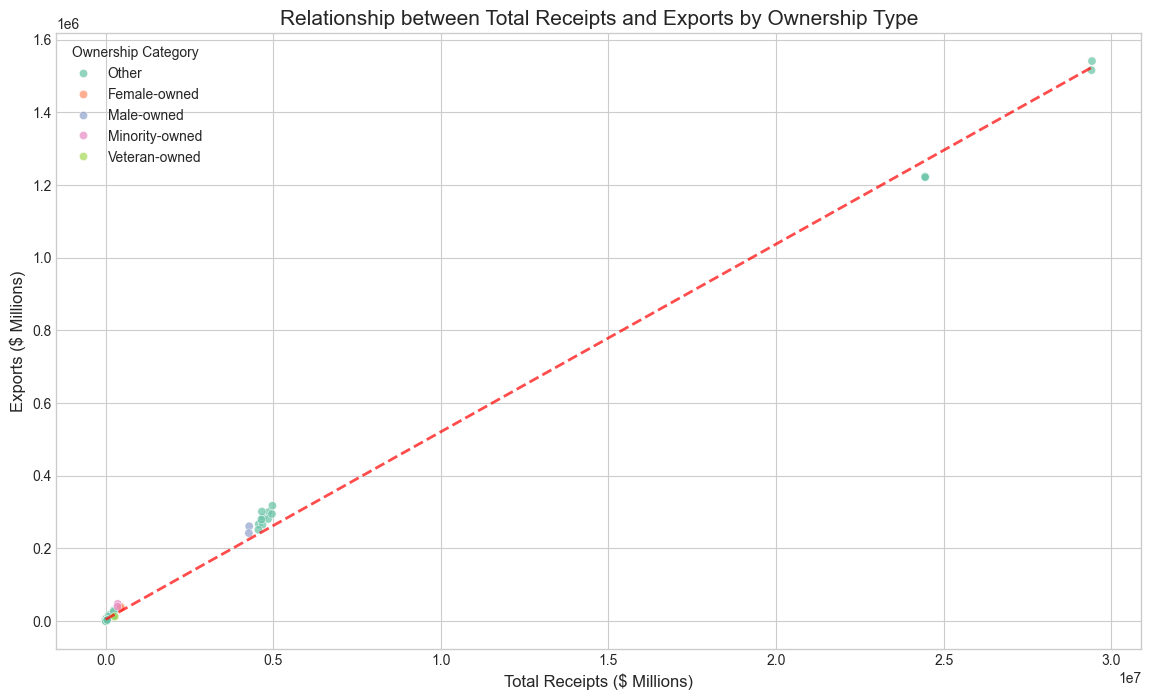

In [82]:
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=exporting_firms,
    x='Receipts (Millions)',
    y='Exports (Millions)',
    hue='Ownership Category',
    # size='Number of paid employees(number)',
    sizes=(20, 200),
    alpha=0.7
)
# Add regression line
sns.regplot(
    x='Receipts (Millions)',
    y='Exports (Millions)',
    data=exporting_firms,
    scatter=False,
    ci=None,
    line_kws={"color": "red", "alpha": 0.7, "lw": 2, "ls": "--"}
)
plt.title('Relationship between Total Receipts and Exports by Ownership Type', fontsize=15)
plt.xlabel('Total Receipts ($ Millions)', fontsize=12)
plt.ylabel('Exports ($ Millions)', fontsize=12)

plt.savefig('images/total_receipts_exports_ownership.png', dpi=300, bbox_inches='tight')

Calculate correlation

In [32]:
exporting_firms

,Exporting Status,Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms(number),"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Number of paid employees(number),"Annual payroll($1,000)",RSE of employer firms(%),RSE of receipts of employer firms(%),RSE of exports of employer firms(%),RSE of number of paid employees(%),RSE of annual payroll(%),Receipts (Millions),Exports (Millions),Export Ratio,Ownership Category
200,Employer firms with exports,All firms,Total,160083,2.942224e+10,1.540694e+09,54254922.0,4.052060e+09,0.7,0.6,1.5,0.6,0.7,2.942224e+07,1540693.608,5.236493,Other
201,Employer firms with exports,All firms,Female,20990,4.496144e+08,4.010668e+07,958874.0,6.751642e+07,2.1,6.4,28.2,3.7,4.4,4.496144e+05,40106.683,8.920239,Female-owned
202,Employer firms with exports,All firms,Male,108009,4.283172e+09,2.609285e+08,8189120.0,6.098098e+08,1.6,2.8,4.5,1.5,1.5,4.283172e+06,260928.527,6.091946,Male-owned
203,Employer firms with exports,All firms,Equally male/female,15405,2.431508e+08,1.652030e+07,561059.0,4.098981e+07,3.4,2.7,9.5,5.6,3.8,2.431508e+05,16520.295,6.794258,Other
204,Employer firms with exports,All firms,Hispanic,9766,9.323926e+07,1.641172e+07,182726.0,1.181910e+07,5.1,6.5,21.5,3.7,3.6,9.323926e+04,16411.716,17.601722,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Employer firms with exports,"Firms with sales/receipts of $1,000,000 or more",Veteran,5163,2.688967e+08,1.246078e+07,535642.0,3.976489e+07,6.7,3.1,8.8,2.5,2.3,2.688967e+05,12460.779,4.634040,Veteran-owned
389,Employer firms with exports,"Firms with sales/receipts of $1,000,000 or more",Equally veteran/nonveteran,1753,4.545837e+07,2.851620e+06,103142.0,8.207018e+06,7.9,19,19.6,12.7,11.7,4.545837e+04,2851.620,6.273036,Other
390,Employer firms with exports,"Firms with sales/receipts of $1,000,000 or more",Nonveteran,105179,4.647548e+09,2.792657e+08,8916162.0,6.624473e+08,1.2,2.5,7.5,1.4,1.3,4.647548e+06,279265.658,6.008881,Other
391,Employer firms with exports,"Firms with sales/receipts of $1,000,000 or more",Classifiable,112095,4.961903e+09,2.945781e+08,9554946.0,7.104192e+08,1.2,2.3,7.1,1.3,1.2,4.961903e+06,294578.057,5.936795,Other


In [33]:
correlation = exporting_firms[['Receipts (Millions)', 'Exports (Millions)']].corr().iloc[0, 1]
correlation

0.9985664813116597

Add text box with correlation and average export ratio

In [34]:
text_box = (
    f"Correlation: {correlation:.2f}\n"
    f"Average Export Ratio: {exporting_firms['Export Ratio'].mean():.1f}%\n"
    f"Median Export Ratio: {exporting_firms['Export Ratio'].median():.1f}%"
)

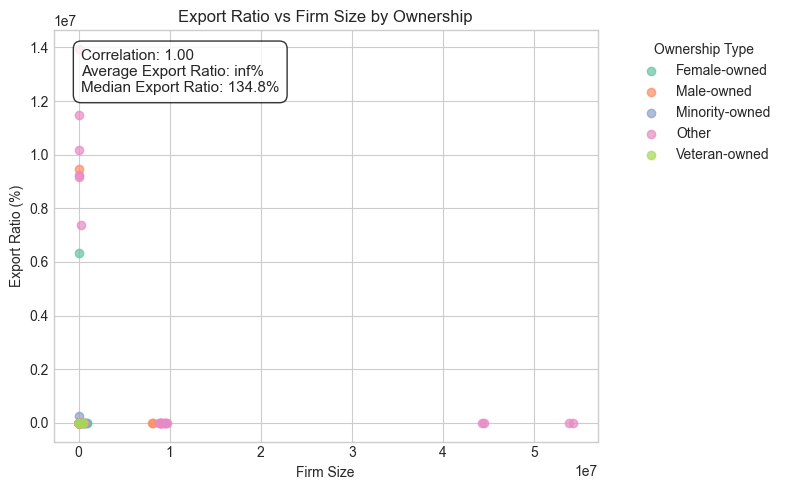

In [83]:
# Plot
plt.figure(figsize=(8, 5))
for ownership, group in exporting_firms.groupby('Ownership Category'):
    plt.scatter(group['Number of paid employees(number)'], group['Export Ratio'], label=ownership, alpha=0.7)

# Annotation box
text_box = (
    f"Correlation: {correlation:.2f}\n"
    f"Average Export Ratio: {exporting_firms['Export Ratio'].mean():.1f}%\n"
    f"Median Export Ratio: {exporting_firms['Export Ratio'].median():.1f}%"
)
plt.annotate(
    text_box,
    xy=(0.05, 0.85),
    xycoords='axes fraction',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
    fontsize=11
)

# Customize
plt.xlabel("Firm Size")
plt.ylabel("Export Ratio (%)")
plt.title("Export Ratio vs Firm Size by Ownership")
plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('images/export_ratio_vs_firm_size.png', dpi=300, bbox_inches='tight')
plt.show()


In [85]:
# Clean the 'Number of paid employees(number)' column
exporting_firms['Number of paid employees(number)'] = pd.to_numeric(
    exporting_firms['Number of paid employees(number)'], errors='coerce'
)

# Drop rows with missing values in either axis column
plot_data = exporting_firms.dropna(subset=['Number of paid employees(number)', 'Export Ratio'])


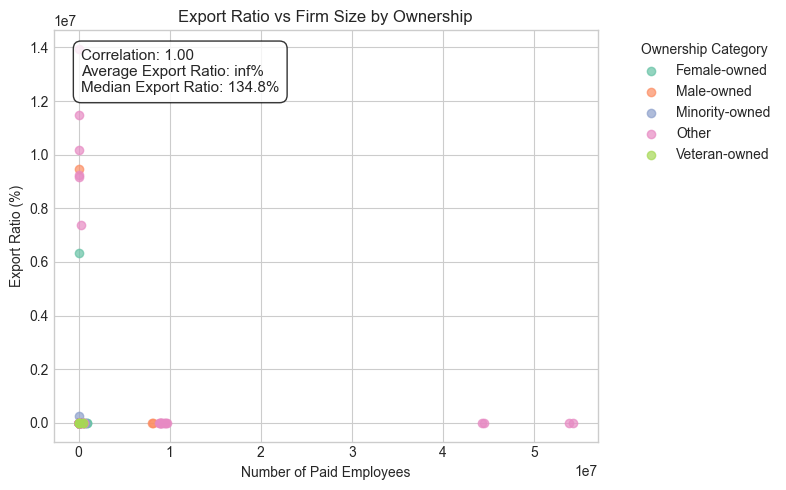

In [86]:
plt.figure(figsize=(8, 5))
for ownership, group in plot_data.groupby('Ownership Category'):
    plt.scatter(group['Number of paid employees(number)'], group['Export Ratio'], label=ownership, alpha=0.7)

# Annotation box
text_box = (
    f"Correlation: {correlation:.2f}\n"
    f"Average Export Ratio: {plot_data['Export Ratio'].mean():.1f}%\n"
    f"Median Export Ratio: {plot_data['Export Ratio'].median():.1f}%"
)
plt.annotate(
    text_box,
    xy=(0.05, 0.85),
    xycoords='axes fraction',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
    fontsize=11
)

# Final plot setup
plt.xlabel("Number of Paid Employees")
plt.ylabel("Export Ratio (%)")
plt.title("Export Ratio vs Firm Size by Ownership")
plt.legend(title='Ownership Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('images/export_ratio_vs_firm_size.png', dpi=300, bbox_inches='tight')
plt.show()


Print summary statistics by ownership category

In [38]:
group_stats = exporting_firms.groupby('Ownership Category').agg({
    'Export Ratio': ['mean', 'median'],
    'Exports (Millions)': ['mean', 'sum'],
    'Number of paid employees(number)': 'mean'
}).round(2)

print("Export statistics by ownership category:")
group_stats

Export statistics by ownership category:


Export Ratio         Exports (Millions)              \
                           mean  median               mean         sum   
Ownership Category                                                       
Female-owned          705244.29  313.51            8911.98    80207.80   
Male-owned           1050336.35  529.60           57983.58   521852.26   
Minority-owned         29827.71  749.51           10509.70    94587.31   
Other                       inf  125.58           70571.96  8609779.66   
Veteran-owned               inf   46.37            3678.21    25747.46   

                   Number of paid employees(number)  
                                               mean  
Ownership Category                                   
Female-owned                              213080.44  
Male-owned                               1819793.22  
Minority-owned                            155917.56  
Other                                    2402373.15  
Veteran-owned                             154711.86

---------------------------------------<br>
Step 4: Small Exporter Subset Creation<br>
---------------------------------------

Define "Small Exporters" as those in the bottom 75% of receipt distribution

In [39]:
receipt_threshold = exporting_firms['Receipts of employer firms($1,000)'].quantile(0.77)
receipt_threshold

12893580.800000072

In [40]:
small_exporters = exporting_firms[
    exporting_firms['Receipts of employer firms($1,000)'] <= receipt_threshold
].copy()
print(f"Created subset of small exporters with receipts below ${receipt_threshold/1000:.2f} million")
print(f"Number of small exporters: {len(small_exporters)} ({len(small_exporters)/len(exporting_firms)*100:.1f}% of all exporters)")

Created subset of small exporters with receipts below $12893.58 million
Number of small exporters: 120 (62.2% of all exporters)


Analyze demographic distribution of small exporters

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Female-owned'),
  Text(2, 0, 'Male-owned'),
  Text(3, 0, 'Minority-owned'),
  Text(4, 0, 'Veteran-owned')])

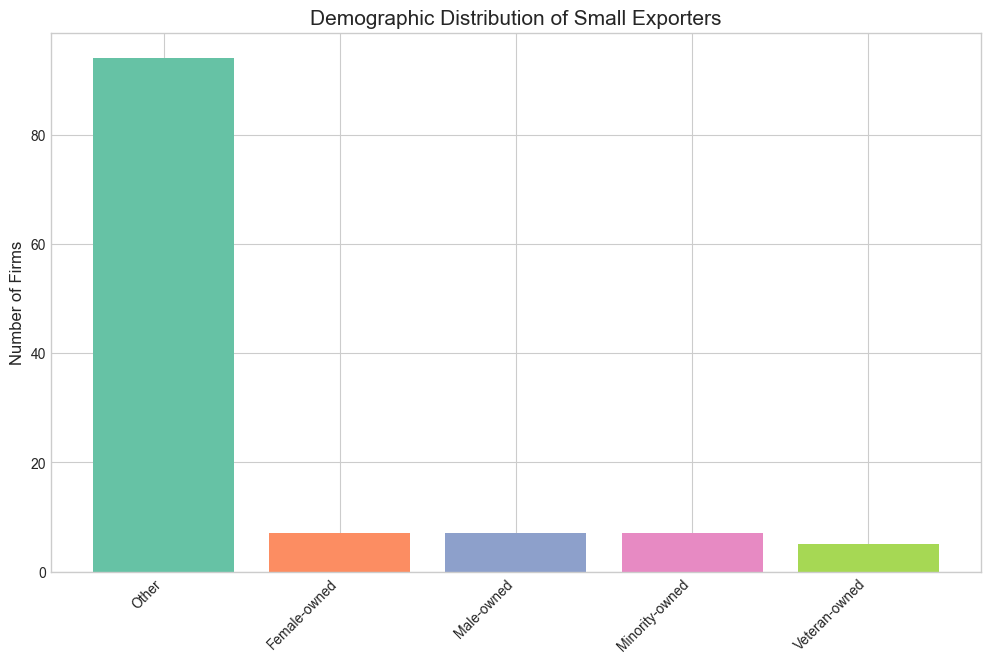

In [41]:
plt.figure(figsize=(12, 7))
demo_counts = small_exporters['Ownership Category'].value_counts()
demo_percentages = demo_counts / demo_counts.sum() * 100

bars = plt.bar(demo_counts.index, demo_counts, color=sns.color_palette("Set2", len(demo_counts)))
plt.title('Demographic Distribution of Small Exporters', fontsize=15)
plt.ylabel('Number of Firms', fontsize=12)
plt.xticks(rotation=45, ha='right')

Add percentage labels on bars

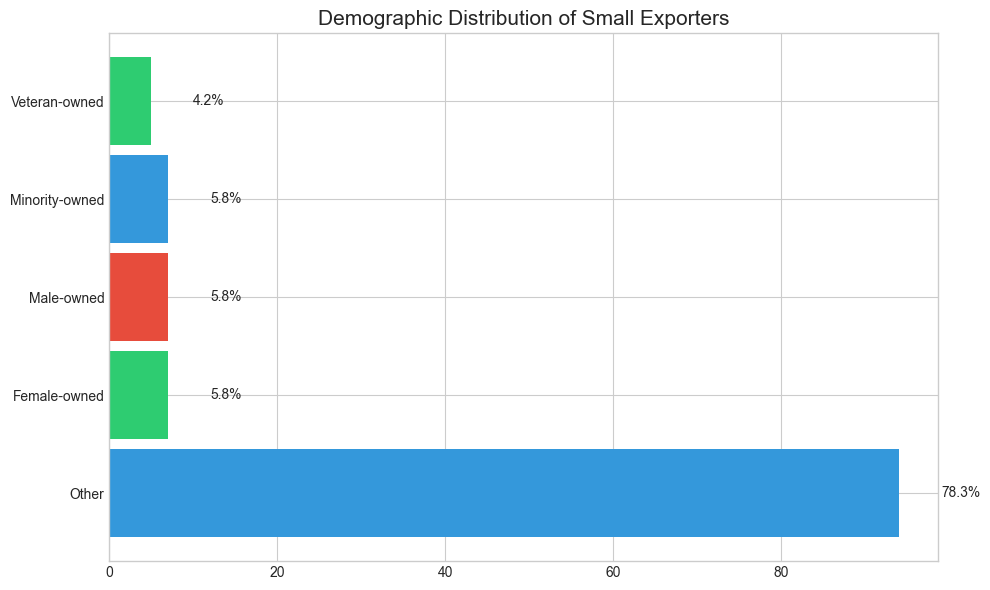

In [87]:
plt.figure(figsize=(10, 6))
bars = plt.barh(demo_counts.index, demo_counts, 
                color=['#3498db', '#2ecc71', '#e74c3c'], 
                height=0.9)

# Add percentages at the end of each bar
for bar, percentage in zip(bars, demo_percentages):
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{percentage:.1f}%',
             ha='left', va='center', fontsize=10)
plt.title('Demographic Distribution of Small Exporters', fontsize=15)
plt.tight_layout()
plt.savefig('images/demographic_dist.png', dpi=300, bbox_inches='tight')
plt.show()

Add percentage labels on bars

---------------------------------------<br>
Step 5: Feature Variance Analysis<br>
---------------------------------------

Select numerical features for analysis

In [43]:
numeric_features = [
    'Employer firms(number)',
    'Receipts of employer firms($1,000)',
    'Exports of employer firms($1,000)',
    'Number of paid employees(number)',
    'Annual payroll($1,000)',
    'Export Ratio'
]

Function to calculate trimmed variance (removing outliers)

In [44]:
def trimmed_variance(series, trim_percent=10):
    # Remove top and bottom trim_percent
    lower_bound = np.percentile(series, trim_percent)
    upper_bound = np.percentile(series, 100 - trim_percent)
    trimmed_data = series[(series >= lower_bound) & (series <= upper_bound)]
    return trimmed_data.var()

Calculate trimmed variance for each feature

In [45]:
variance_data = {}
for feature in numeric_features:
    if feature in small_exporters.columns:
        variance_data[feature] = trimmed_variance(small_exporters[feature].dropna())
        
variance_data

{'Employer firms(number)': 2587846.736403509,
 'Receipts of employer firms($1,000)': 426084244386.2052,
 'Exports of employer firms($1,000)': 1981155398714.0417,
 'Number of paid employees(number)': 53335134.49462719,
 'Annual payroll($1,000)': 109950329530.12097,
 'Export Ratio': 390818.98379170685}

Create and sort variance DataFrame

In [46]:
variance_df = pd.DataFrame({
    'Feature': list(variance_data.keys()),
    'Trimmed Variance': list(variance_data.values())
})
variance_df = variance_df.sort_values('Trimmed Variance', ascending=False)
variance_df


,Feature,Trimmed Variance
2,"Exports of employer firms($1,000)",1.981155e+12
1,"Receipts of employer firms($1,000)",4.260842e+11
4,"Annual payroll($1,000)",1.099503e+11
3,Number of paid employees(number),5.333513e+07
0,Employer firms(number),2.587847e+06
5,Export Ratio,3.908190e+05


Normalize variance for better visualization (log scale)

In [47]:
variance_df['Log Variance'] = np.log1p(variance_df['Trimmed Variance'])
variance_df['Log Variance']

2    28.314701
1    26.777903
4    25.423295
3    17.792106
0    14.766337
5    12.876002
Name: Log Variance, dtype: float64

Plot feature variances

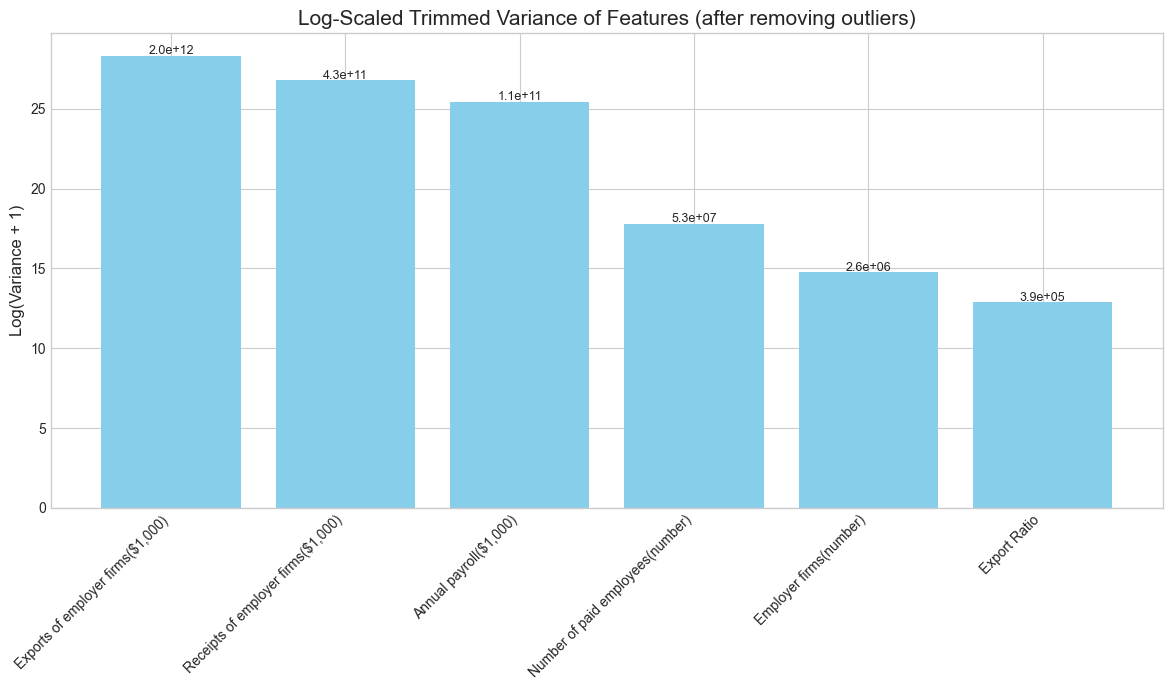

In [88]:
plt.figure(figsize=(12, 7))
bars = plt.bar(variance_df['Feature'], variance_df['Log Variance'], color='skyblue')
plt.title('Log-Scaled Trimmed Variance of Features (after removing outliers)', fontsize=15)
plt.ylabel('Log(Variance + 1)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, (_, row) in enumerate(variance_df.iterrows()):
    plt.annotate(
        f"{row['Trimmed Variance']:.1e}",
        xy=(i, row['Log Variance'] + 0.1),
        ha='center', 
        fontsize=9
    )

plt.tight_layout()
plt.savefig('images/log_scale_features.png', dpi=300, bbox_inches='tight')
plt.show()

Add actual variance values as text

Select the top 5 highest-variance features for clustering

In [49]:
top_features = variance_df.head(5)['Feature'].tolist()
print(f"Selected high-variance features for clustering: {top_features}")

Selected high-variance features for clustering: ['Exports of employer firms($1,000)', 'Receipts of employer firms($1,000)', 'Annual payroll($1,000)', 'Number of paid employees(number)', 'Employer firms(number)']


---------------------------------------<br>
Step 6: K-Means Model Development<br>
---------------------------------------

Prepare data for clustering

In [50]:
cluster_data = small_exporters[top_features].copy()
cluster_data.head()

,"Exports of employer firms($1,000)","Receipts of employer firms($1,000)","Annual payroll($1,000)",Number of paid employees(number),Employer firms(number)
209,341117.0,4248343.0,641225.0,9833.0,470
211,38188.0,1949681.0,269328.0,4160.0,61
220,7143982.0,97.0,15296812.0,275396.0,571
221,380410.0,6.0,270392.0,4023.0,58
222,5386273.0,57.0,3636233.0,56181.0,341


Handle missing values (if any)

In [51]:
cluster_data = cluster_data.fillna(cluster_data.mean())
print(cluster_data)
cluster_data.head()

     Exports of employer firms($1,000)  Receipts of employer firms($1,000)  \
209                           341117.0                           4248343.0   
211                            38188.0                           1949681.0   
220                          7143982.0                                97.0   
221                           380410.0                                 6.0   
222                          5386273.0                                57.0   
..                                 ...                                 ...   
370                          5389157.0                           8914360.0   
371                          5630542.0                           9642696.0   
372                           576566.0                            322292.0   
382                           302966.0                           4170831.0   
384                            34595.0                           1941748.0   

     Annual payroll($1,000)  Number of paid employees(number)  

,"Exports of employer firms($1,000)","Receipts of employer firms($1,000)","Annual payroll($1,000)",Number of paid employees(number),Employer firms(number)
209,341117.0,4248343.0,641225.0,9833.0,470
211,38188.0,1949681.0,269328.0,4160.0,61
220,7143982.0,97.0,15296812.0,275396.0,571
221,380410.0,6.0,270392.0,4023.0,58
222,5386273.0,57.0,3636233.0,56181.0,341


Normalize the data

In [52]:
# Replace inf/-inf with NaN
cluster_data = cluster_data.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN (including those converted from inf)
# cluster_data = cluster_data.dropna()

# Fill NaNs with column means
cluster_data = cluster_data.fillna(cluster_data.mean())


In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
scaled_data[:5]

array([[-0.52424458,  1.6033884 ,  0.03711347, -0.04872549, -0.45907359],
       [-0.67918361,  0.49345792, -0.18687602, -0.24063033, -0.59065033],
       [ 2.95521529, -0.44791697,  8.86401266,  8.93467365, -0.42658154],
       [-0.5041474 , -0.44796091, -0.18623518, -0.24526473, -0.59161544],
       [ 2.05620025, -0.44793629,  1.84097391,  1.51912313, -0.50057335]])

Function to evaluate different cluster counts

In [54]:
def evaluate_kmeans(data, max_clusters=10):
    inertia_scores = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia_scores.append(kmeans.inertia_)
        
        # Calculate silhouette score
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
    
    return range(2, max_clusters + 1), inertia_scores, silhouette_scores

Evaluate k-means with different cluster counts

In [55]:
cluster_range, inertia_values, silhouette_values = evaluate_kmeans(scaled_data)

Plot evaluation metrics

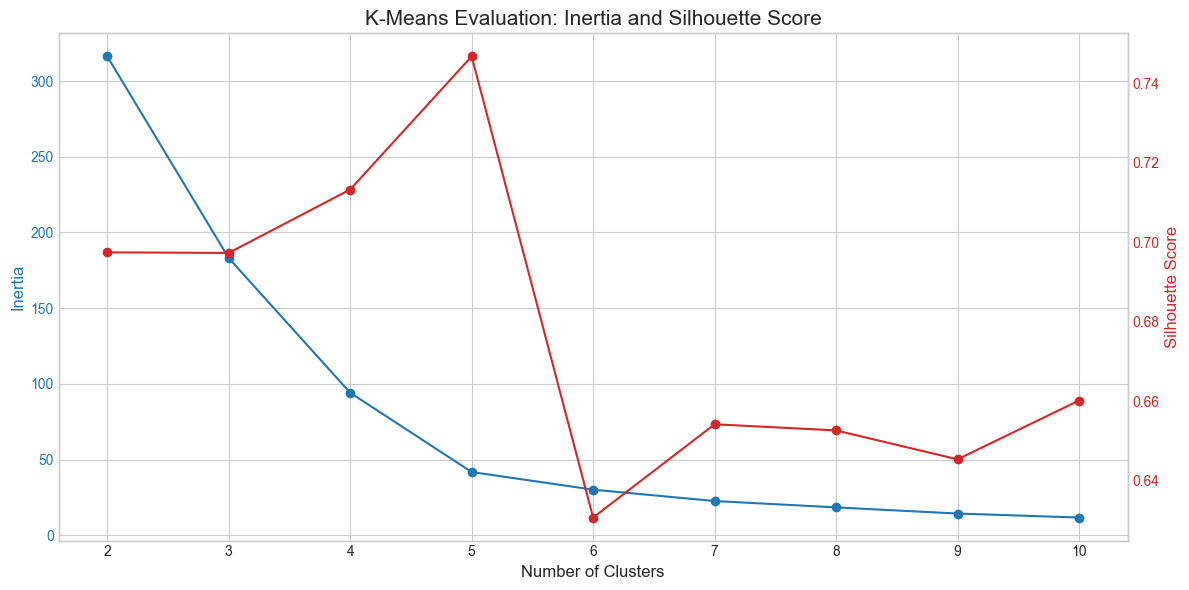

In [89]:
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters', fontsize=12)
ax1.set_ylabel('Inertia', color=color, fontsize=12)
ax1.plot(cluster_range, inertia_values, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color, fontsize=12)
ax2.plot(cluster_range, silhouette_values, 'o-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('K-Means Evaluation: Inertia and Silhouette Score', fontsize=15)
plt.grid(False)
plt.tight_layout()

plt.savefig('images/inertia_silhouette_score.png', dpi=300, bbox_inches='tight')
plt.show()

#### Determine optimal number of clusters<br>


In [57]:
optimal_clusters = cluster_range[silhouette_values.index(max(silhouette_values))]
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

Optimal number of clusters based on silhouette score: 5


Apply final K-means model with optimal cluster count

In [58]:
# small_exporters_cleaned = small_exporters.dropna()
# scaled_data = scaler.fit_transform(small_exporters_cleaned)
small_exporters_cleaned = small_exporters.replace([np.inf, -np.inf], np.nan)

In [59]:
print(len(scaled_data))
print(len(small_exporters_cleaned))

120
120


In [96]:
import joblib

final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
small_exporters_cleaned['Cluster'] = final_kmeans.fit_predict(scaled_data)

# Save the model
joblib.dump(final_kmeans, 'models/kmeans_model.pkl')

['models/kmeans_model.pkl']

In [61]:
small_exporters_cleaned.head()

,Exporting Status,Receipt Size,"Sex, Ethnicity, Race, and Veteran Status",Employer firms(number),"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Number of paid employees(number),"Annual payroll($1,000)",RSE of employer firms(%),RSE of receipts of employer firms(%),RSE of exports of employer firms(%),RSE of number of paid employees(%),RSE of annual payroll(%),Receipts (Millions),Exports (Millions),Export Ratio,Ownership Category,Cluster
209,Employer firms with exports,All firms,American Indian and Alaska Native,470,4248343.0,341117.0,9833.0,641225.0,16.4,6.1,66.4,7.0,7.7,4248.343,341.117,8.029413e+00,Other,0
211,Employer firms with exports,All firms,Native Hawaiian and Other Pacific Islander,61,1949681.0,38188.0,4160.0,269328.0,18.6,4.9,33.5,14.1,8.3,1949.681,38.188,1.958679e+00,Other,0
220,Employer firms with exports,"Firms with sales/receipts of less than $5,000",Total,571,97.0,7143982.0,275396.0,15296812.0,5.7,46.6,1.4,0.9,1.4,0.097,7143.982,7.364930e+06,Other,2
221,Employer firms with exports,"Firms with sales/receipts of less than $5,000",Female,58,6.0,380410.0,4023.0,270392.0,15.6,25.2,21.3,8.6,6.3,0.006,380.410,6.340167e+06,Female-owned,0
222,Employer firms with exports,"Firms with sales/receipts of less than $5,000",Male,341,57.0,5386273.0,56181.0,3636233.0,7.6,27.9,2.1,2.8,1.5,0.057,5386.273,9.449602e+06,Male-owned,3


Print cluster sizes

In [62]:
cluster_sizes = small_exporters_cleaned['Cluster'].value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} firms ({size/len(small_exporters_cleaned)*100:.1f}%)")

Cluster 0: 91 firms (75.8%)
Cluster 1: 7 firms (5.8%)
Cluster 2: 1 firms (0.8%)
Cluster 3: 6 firms (5.0%)
Cluster 4: 15 firms (12.5%)


---------------------------------------<br>
Step 7: Cluster Analysis & Visualization<br>
---------------------------------------

Calculate mean values for each feature by cluster

In [63]:
cluster_means = small_exporters_cleaned.groupby('Cluster')[top_features].mean()
print("\nCluster means for key features:")
# print(cluster_means)
cluster_means


Cluster means for key features:


,"Exports of employer firms($1,000)","Receipts of employer firms($1,000)","Annual payroll($1,000)",Number of paid employees(number),Employer firms(number)
Cluster,,,,,
0,3.749406e+05,2.716597e+05,7.446748e+04,1760.417582,581.714286
1,5.102887e+06,8.391096e+06,2.244191e+06,49241.285714,11411.000000
2,7.143982e+06,9.700000e+01,1.529681e+07,275396.000000,571.000000
3,5.782531e+06,5.583333e+01,3.935524e+06,61376.500000,412.666667
4,3.483485e+06,1.857909e+06,5.437789e+05,13617.733333,6118.733333


Scale the means for visualization (since the features have very different scales)

In [64]:
scaled_means = cluster_means.copy()
for feature in top_features:
    feature_max = scaled_means[feature].max()
    if feature_max > 0:  # Avoid division by zero
        scaled_means[feature] = scaled_means[feature] / feature_max

Create heatmap of scaled feature means by cluster

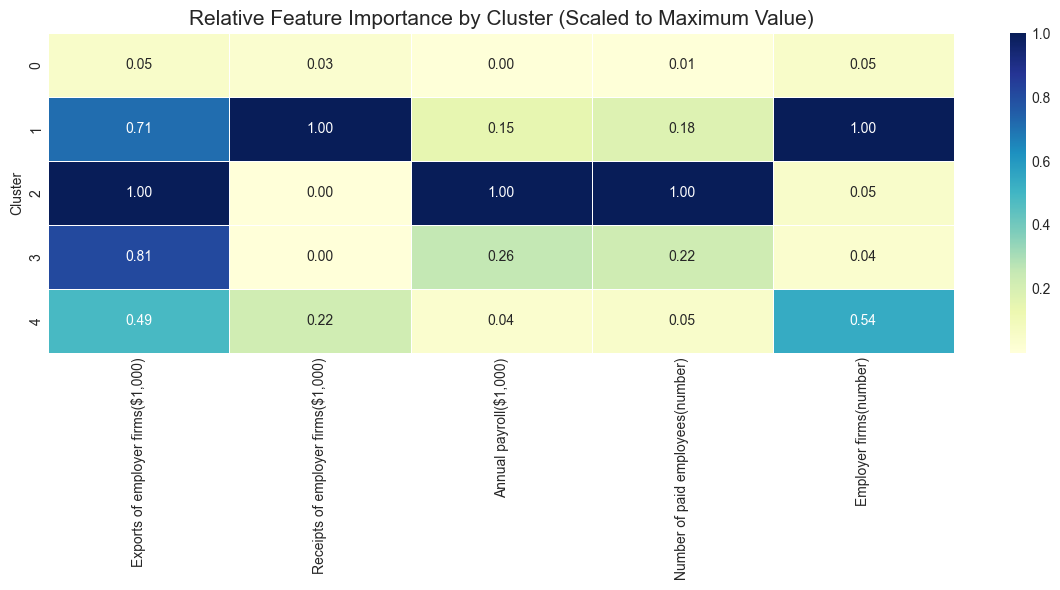

In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(scaled_means, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Relative Feature Importance by Cluster (Scaled to Maximum Value)', fontsize=15)
plt.tight_layout()

plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

Create a more interpretable visualization with actual values<br>
Reshape data for easier plotting

In [92]:
plot_data = pd.melt(
    cluster_means.reset_index(), 
    id_vars=['Cluster'],
    value_vars=top_features,
    var_name='Feature',
    value_name='Value'
)

Plot the means for each feature by cluster

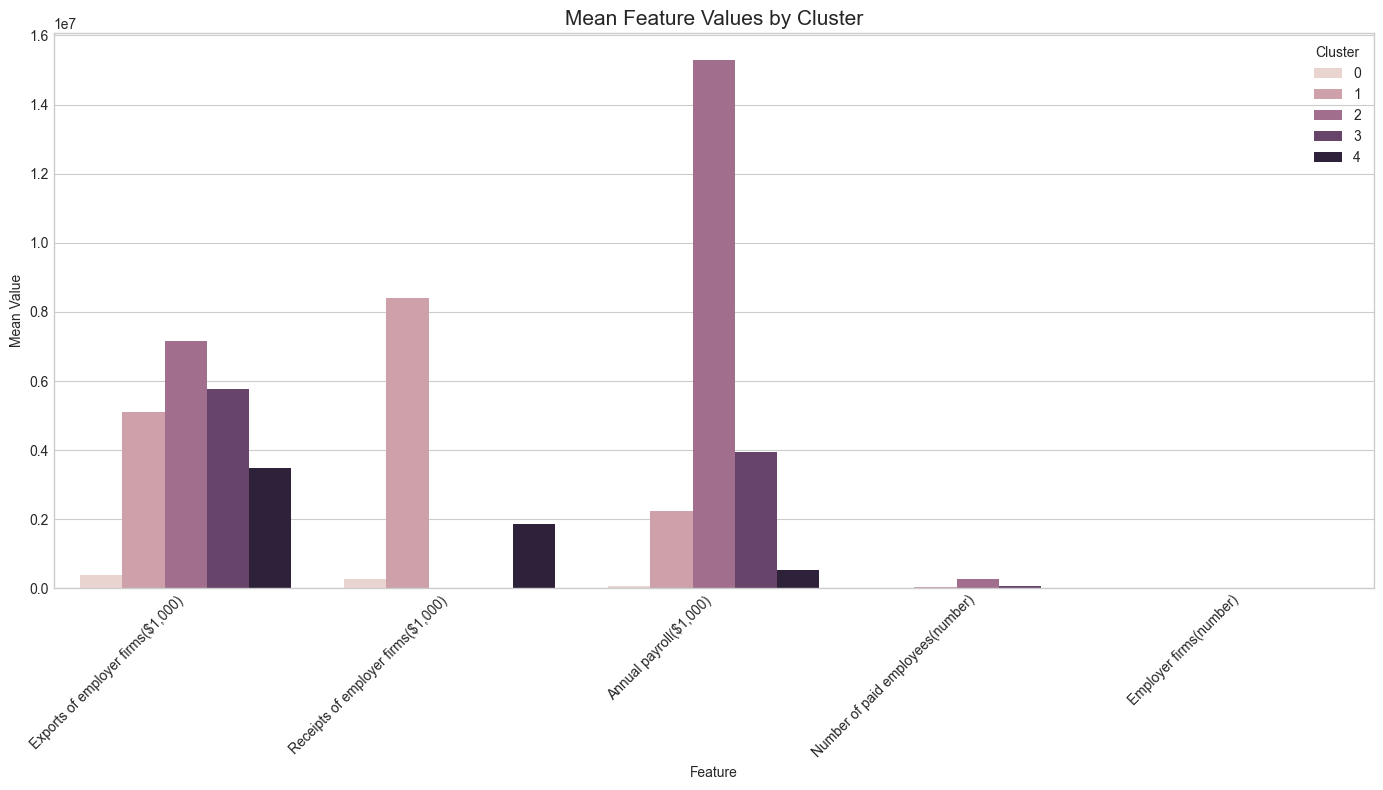

In [93]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Value', hue='Cluster', data=plot_data)
plt.title('Mean Feature Values by Cluster', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.ylabel('Mean Value')
plt.tight_layout()

plt.savefig('images/mean_features_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

Apply PCA for 2D visualization

In [68]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

Create a DataFrame with the principal components

In [69]:
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)
# pca_df['Cluster'] = small_exporters_cleaned['Cluster']
pca_df['Cluster'] = small_exporters_cleaned['Cluster'].values

pca_df['Ownership Category'] = small_exporters_cleaned['Ownership Category'].values

pca_df.head()

,PC1,PC2,Cluster,Ownership Category
0,0.173728,0.592495,0,Other
1,-0.588051,0.141161,0,Other
2,9.252236,-8.816930,2,Other
3,-0.874935,-0.347982,0,Female-owned
4,2.180975,-2.094620,3,Male-owned


Plot the clusters

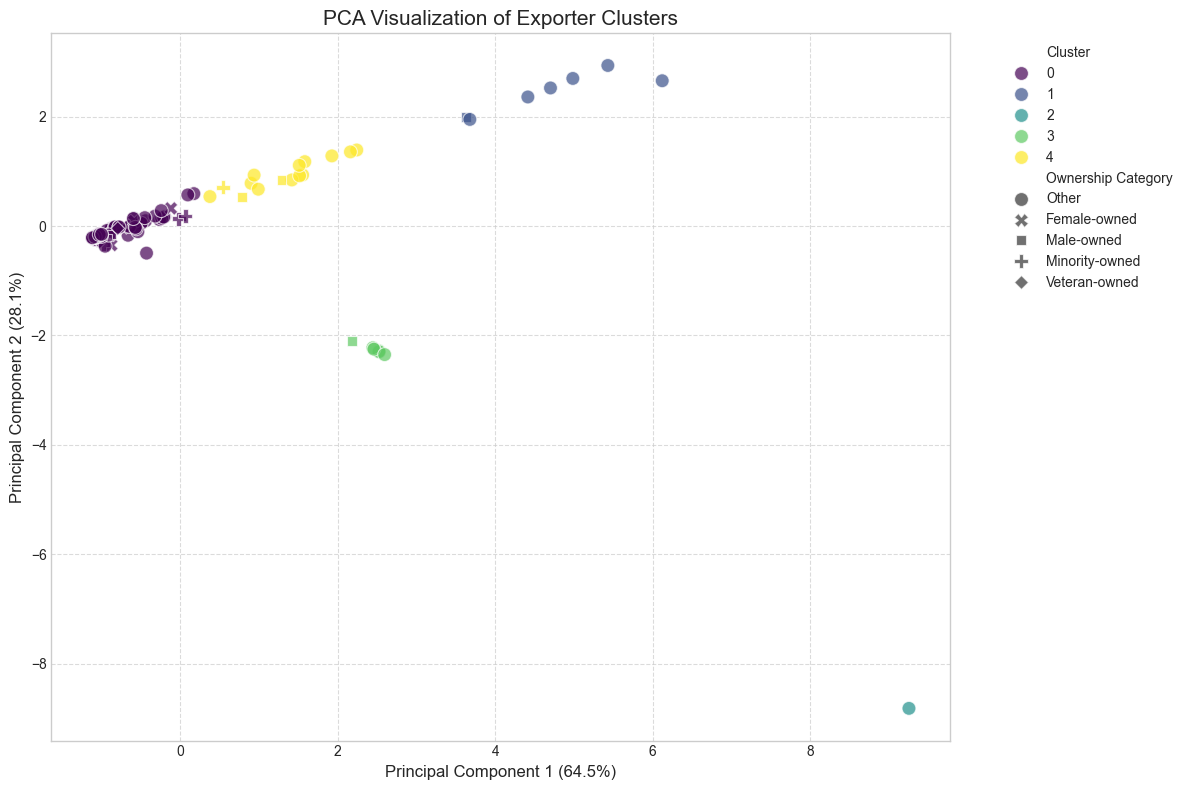

In [97]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    style='Ownership Category',
    palette='viridis',
    data=pca_df,
    s=100,
    alpha=0.7
)

plt.title('PCA Visualization of Exporter Clusters', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('images/pca_visualization_clusters.png', dpi=300, bbox_inches='tight')
plt.close()

Print PCA components interpretation

In [71]:
component_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=top_features
)

print("\nPCA Components:")
print(component_df)


PCA Components:
                                         PC1       PC2
Exports of employer firms($1,000)   0.504983 -0.003598
Receipts of employer firms($1,000)  0.396199  0.520176
Annual payroll($1,000)              0.443693 -0.500117
Number of paid employees(number)    0.468002 -0.437787
Employer firms(number)              0.414884  0.536311


Create subplot for each cluster

---------------------------------------<br>
Step 9: Business Profile Summary<br>
---------------------------------------

Create a summary of each cluster's business profile

In [72]:
profile_summary = pd.DataFrame()

Add size of each cluster

In [73]:
profile_summary['Size'] = cluster_sizes
profile_summary

,Size
Cluster,
0,91
1,7
2,1
3,6
4,15


Add mean values for key metrics

In [74]:
for feature in ['Receipts of employer firms($1,000)', 'Exports of employer firms($1,000)', 
                'Export Ratio', 'Number of paid employees(number)']:
    profile_summary[feature] = small_exporters_cleaned.groupby('Cluster')[feature].mean()

profile_summary[feature]

Cluster
0      1760.417582
1     49241.285714
2    275396.000000
3     61376.500000
4     13617.733333
Name: Number of paid employees(number), dtype: float64

Add most common demographic

In [75]:
demographics = []
for cluster_id in profile_summary.index:
    cluster_data = small_exporters_cleaned[small_exporters_cleaned['Cluster'] == cluster_id]
    top_demo = cluster_data['Ownership Category'].value_counts().index[0]
    demographics.append(top_demo)
    
profile_summary['Primary Ownership'] = demographics
profile_summary

,Size,"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Export Ratio,Number of paid employees(number),Primary Ownership
Cluster,,,,,,
0,91,2.716597e+05,3.749406e+05,7.487803e+04,1760.417582,Other
1,7,8.391096e+06,5.102887e+06,6.101509e+01,49241.285714,Other
2,1,9.700000e+01,7.143982e+06,7.364930e+06,275396.000000,Other
3,6,5.583333e+01,5.782531e+06,1.057788e+07,61376.500000,Other
4,15,1.857909e+06,3.483485e+06,2.543904e+02,13617.733333,Other


Format the numerical columns for readability

In [76]:
profile_summary['Receipts of employer firms($1,000)'] = profile_summary['Receipts of employer firms($1,000)'].map('${:,.0f}'.format)
profile_summary['Exports of employer firms($1,000)'] = profile_summary['Exports of employer firms($1,000)'].map('${:,.0f}'.format)
profile_summary['Export Ratio'] = profile_summary['Export Ratio'].map('{:.1f}%'.format)
profile_summary['Number of paid employees(number)'] = profile_summary['Number of paid employees(number)'].map('{:,.0f}'.format)

print("\nSmall Exporter Cluster Profiles:")
profile_summary


Small Exporter Cluster Profiles:


,Size,"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Export Ratio,Number of paid employees(number),Primary Ownership
Cluster,,,,,,
0,91,"$271,660","$374,941",74878.0%,"1,760",Other
1,7,"$8,391,096","$5,102,887",61.0%,"49,241",Other
2,1,$97,"$7,143,982",7364929.9%,"275,396",Other
3,6,$56,"$5,782,531",10577875.5%,"61,376",Other
4,15,"$1,857,909","$3,483,485",254.4%,"13,618",Other


Print the summary table

In [77]:
print("\nSmall Exporter Cluster Profiles:")
profile_summary


Small Exporter Cluster Profiles:


,Size,"Receipts of employer firms($1,000)","Exports of employer firms($1,000)",Export Ratio,Number of paid employees(number),Primary Ownership
Cluster,,,,,,
0,91,"$271,660","$374,941",74878.0%,"1,760",Other
1,7,"$8,391,096","$5,102,887",61.0%,"49,241",Other
2,1,$97,"$7,143,982",7364929.9%,"275,396",Other
3,6,$56,"$5,782,531",10577875.5%,"61,376",Other
4,15,"$1,857,909","$3,483,485",254.4%,"13,618",Other


Give meaningful names to clusters based on their characteristics

In [78]:
cluster_names = {}
for cluster_id in profile_summary.index:
    if profile_summary.loc[cluster_id, 'Export Ratio'].replace('%', '') > '70':
        cluster_names[cluster_id] = "High-Export Intensity"
    elif 'Female' in profile_summary.loc[cluster_id, 'Primary Ownership']:
        cluster_names[cluster_id] = "Female-Led Exporters"
    elif int(profile_summary.loc[cluster_id, 'Number of paid employees(number)'].replace(',', '')) > 50000:
        cluster_names[cluster_id] = "Larger Employers"
    else:
        cluster_names[cluster_id] = f"General Exporters Group {cluster_id}"

print("\nProposed Cluster Names:")
for cluster_id, name in cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")


Proposed Cluster Names:
Cluster 0: High-Export Intensity
Cluster 1: General Exporters Group 1
Cluster 2: High-Export Intensity
Cluster 3: Larger Employers
Cluster 4: General Exporters Group 4


---------------------------------------<br>
Final Conclusion<br>
---------------------------------------

In [79]:
print("\nProject Conclusion:")
print("This analysis has identified distinct segments within the small exporter community,")
print("each with unique characteristics in terms of financial performance, export intensity,")
print("ownership demographics, and target markets. These insights can help inform targeted")
print("policy interventions and support programs for different types of exporting businesses.")


Project Conclusion:
This analysis has identified distinct segments within the small exporter community,
each with unique characteristics in terms of financial performance, export intensity,
ownership demographics, and target markets. These insights can help inform targeted
policy interventions and support programs for different types of exporting businesses.


#### Authored by Destiny Otto